# **Data Analysis Project: [Air Quality Dataset]**
- **Nama:** Gusti Ayu Putu Erika Erlina
- **Email:** erika.erlinaa@gmail.com
- **ID Dicoding:** erika777

# **Questions**:
* Pertanyaan 1: Analisislah korelasi yang terjadi antara faktor meteorologis dengan berbagai polutan dan partikelnya
* Pertanyaan 2: Analisislah hubungan linear antara faktor meteorologis dengan konsentrasi PM2.5 dan PM10
* Pertanyaan 3: Bagaimanakah rata-rata tahunan PM2.5 dan PM10 selama 5 tahun terakhir?
* Pertanyaan 4: Tunjukkan rata-rata bulanan konsentrasi PM2.5 dan PM10 dalam kurun waktu 5 tahun (2013 - 2017)
* Pertanyaan 5: Bagaimanakah kategori udara berdasarkan konsentrasi PM2.5 dan PM10?
* Pertanyaan 6: Stasiun manakah yang memiliki kategori sangat tidak sehat dan berbahaya terbanyak?
* Pertanyaan 7: Kapan kualitas udara dengan konsentrasi PM2.5 dan PM10 berada pada level yang tidak sehat bagi kesehatan?

# **Import Libraries**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Data Wrangling**

### **Gathering Data**

Data kualitas udara dikumpulkan dari berbagai stasiun, termasuk Aotizhongxin, Changping, Dongsi, dan lainnya, dalam periode 2013 hingga 2017. Setiap stasiun mencatat parameter seperti PM2.5, PM10, polutan udara lainnya, dan faktor meteorologi untuk menganalisis tren polusi udara. 

In [58]:
Aotizhongxin = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
Guanyuan = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
Gucheng = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
Huairou = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
Nongzhanguan = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Shunyi = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
Tiantan = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
Wanliu = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
Wanshouxigong = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

### **Merged Data**

Gabungkan data dari berbagai stasiun menjadi 1 dataset.

In [59]:
# nama stasiun
stations = [Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong]

merged_df = pd.concat(stations, axis=0, ignore_index=True)

### **Assesing Data**

In [60]:
merged_df.shape

(420768, 18)

**Insight**:
* Data yang telah digabungkan terdiri dari `420.768` baris dan `18` kolom

In [61]:
merged_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [62]:
merged_df.tail()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
420763  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong

In [63]:
Aotizhongxin.shape

(35064, 18)

**Insights**:  
* Kolom `No` merepresentasikan jumlah total entri dalam setiap tabel stasiun. Hal ini terlihat pada lima baris terakhir, di mana indeks menunjukkan urutan entri terakhir, sementara kolom `No` mencantumkan angka `35064`, yang juga sesuai dengan jumlah baris dalam tabel stasiun Aotizhongxin.  
* Kolom `hour` menunjukkan bahwa data dicatat setiap jam.  
* Berdasarkan lima baris data pertama dan terakhir, tidak ditemukan adanya duplikasi atau entri yang identik.

In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insights**:
* Data types: Terdapat 11 kolom dengan tipe data `float64`, 5 kolom dengan tipe data `int64`, dan 2 kolom dengan tipe `object`.
* Terdapat missing values pada beberapa kolom.
* Kolom `year`, `month`, `day`, `hour` sebaiknya dikonversi menjadi tipe data timestamp dari `int64`, untuk analisis berbasis waktu yang lebih akurat.

In [65]:
print(f'banyaknya data yang terduplikasi: {merged_df.duplicated().sum()}')

banyaknya data yang terduplikasi: 0


In [66]:
merged_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

**Insights:**
* Tidak terdapat data yang terduplikasi.
* Terdapat missing values pada beberapa kolom seperti `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`.
* Missing values terdapat dalam jumlah yang banyak sehingga tidak bisa di-drop karena akan menghilangkan informasi data yang sebenarnya.
* Perlu dilakukan interpolasi atau disesuaikan dengan approach yang akan dilakukan.

In [67]:
merged_df.describe().T

count          mean           std        min      25%      50%  \
No     420768.0  17532.500000  10122.116943     1.0000  8766.75  17532.5   
year   420768.0   2014.662560      1.177198  2013.0000  2014.00   2015.0   
month  420768.0      6.522930      3.448707     1.0000     4.00      7.0   
day    420768.0     15.729637      8.800102     1.0000     8.00     16.0   
hour   420768.0     11.500000      6.922195     0.0000     5.75     11.5   
PM2.5  412029.0     79.793428     80.822391     2.0000    20.00     55.0   
PM10   414319.0    104.602618     91.772426     2.0000    36.00     82.0   
SO2    411747.0     15.830835     21.650603     0.2856     3.00      7.0   
NO2    408652.0     50.638586     35.127912     1.0265    23.00     43.0   
CO     400067.0   1230.766454   1160.182716   100.0000   500.00    900.0   
O3     407491.0     57.372271     56.661607     0.2142    11.00     45.0   
TEMP   420370.0     13.538976     11.436139   -19.9000     3.10     14.5   
PRES   420375.0   1010.746982     10.474055   982.4000  1002.30   1010.4   
DEWP   420365.0      2.490822     13.793847   -43.4000    -8.90      3.1   
RAIN   420378.0      0.064476      0.821004     0.0000     0.00      0.0   
WSPM   420450.0      1.729711      1.246386     0.0000     0.90      1.4   

            75%      max  
No     26298.25  35064.0  
year    2016.00   2017.0  
month     10.00     12.0  
day       23.00     31.0  
hour      17.25     23.0  
PM2.5    111.00    999.0  
PM10     145.00    999.0  
SO2       20.00    500.0  
NO2       71.00    290.0  
CO      1500.00  10000.0  
O3        82.00   1071.0  
TEMP      23.30     41.6  
PRES    1019.00   1042.8  
DEWP      15.10     29.1  
RAIN       0.00     72.5  
WSPM       2.20     13.2

**Insights**:
* Informasi Waktu:
    * `year`: Data berasal dari tahun 2013 hingga 2017.
    * `month`: Data berasal dari bulan pertama hingga terakhir (bulan ke-12).
    * `day`: Max ada 31 hari yang tercatat.
    * `hour`: Data dicatat dari awal pergantian hari hingga jam ke-23.

* Polutan Udara:

    * `PM2.5`: Rata-rata konsentrasi polutan yang tercatat adalah `79.79 µg/m³` atau sebanding dengan 80 µg/m³, konsentrasi PM2.5 memiliki persebaran yang cukup luas dari mean karena std-nya `80.82`. Dari ringkasan statistik, terlihat bahwa mean = `79.79 µg/m³` > median (50%) = `55 µg/m³` sehingga mengindikasikan distribusinya right-skewwed (terkonsentrasi ke sisi kiri) atau distribusi asimetrik. Data `PM2.5` memiliki rentang yang sangat besar yaitu dengan `min = 2 µg/m³` dan `max = 999 µg/m³`, dengan  kuartil 1 `(Q1) = 20 µg/m³`, `Q2 = 55 µg/m³`, dan `Q3 = 111 µg/m³` yang menunjukkan selisih antar kuartil relatif kecil. Mengingat selisihnya yang relatif kecil dibandingkan rentang keseluruhan, Q3 yang relatif rendah yaitu 111 µg/m³, serta batas atas untuk deteksi outlier dihitung sebagai `Q3 + 1.5 × IQR` maka nilai di sekitar maksimum 999 µg/m³ kemungkinan besar merupakan outlier karena jauh melebihi kisaran ini.

    * `PM10, SO2, CO, NO2, O3`: Dari ringkasan statistik, terlihat bahwa mean dari kolom-kolom berikut lebih dari median (50%), hal ini mengindikasikan bahwa distribusi datanya asimetrik atau distribusi right-skewed, di mana sebagian besar data terkonsentrasi pada nilai rendah, tetapi ada ekor panjang ke kanan akibat nilai-nilai ekstrem yang lebih tinggi. Nilai maksimum yang relatif tinggi, selisih antar kuartil yang relatif kecil dibandingkan rentang keseluruhan, dan batas atas untuk deteksi outlier dihitung sebagai `Q3 + 1.5 × IQR` maka nilai di sekitar maksimum kemungkinan menjadi outlier.

* Faktor Meteorologi:
    * `TEMP`: Suhu rata-rata tercatat `13.54 °C`, dengan variasi suhu yang cukup besar yang ditandai dengan nilai standar deviasinya `11.44 °C`. Suhu terendah yang tercatat adalah `-19.9 °C` dan suhu tertinggi adalah `41.6 °C`. Dari ringkasan statistik terlihat bahwa median = `14.5 °C` cukup dekat dengan mean yang menandakan bahwa distribusi cukup simetris.
    * `PRESS`: Tekanan udara rata-rata `1010.75 hPa` dengan variasi tekanan sebesar `10.47 hPa`. Tekanan yang tercatat memiliki rentang yang cukup besar, yaitu `min = 982.4 hPa` dan `max = 1042.8 hPa`. Dari ringkasan terlihat bahwa median = `1010.4 hPa` dan mean = `1010.75 hPa` memiliki nilai yang cukup dekat sehingga distribusinya bisa dikatakan hampir simetris.
    * `DEWP`: Rata-rata titik embun yang tercatat adalah ` 2.49 °C`, dengan nilai minimum `-43.4 °C` dan maksimum `29.1 °C`. Standar deviasi `13.79 °C` menunjukkan variasi yang cukup besar dan menggambarkan kondisi kelembaban yang bervariasi.
    * `RAIN`: Curah hujan rata-rata `0.06 mm`, dengan nilai maksimum `72.5 mm`, menunjukkan bahwa sebagian besar waktu tidak ada hujan (nilai median dan kuartil 3 bernilai 0).
    * `WSPM`: Rata-rata kecepatan angin yang tercatat adalah `1.73 m/s`, dengan standar deviasi `1.25 m/s`. Nilai maksimum `13.2 m/s` menunjukkan ada beberapa momen dengan angin kencang, tetapi sebagian besar waktu kecepatan angin berada di kisaran rendah. 

* Issues: Outlier yang terdapat dalam data kemungkinan besar tidak akan di-drop karena analisis akan berfokus pada lonjakan konsentrasi partikel polutan, yaitu PM2.5 dan PM10.

In [68]:
# check incorrect values
for col in merged_df.select_dtypes(include=['object']).columns:
    print(merged_df[col].value_counts(dropna=False))
    print("-" * 25)

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
NaN     1822
Name: count, dtype: int64
-------------------------
station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64
-------------------------


**Insights**:
* Tidak terdapat kesalahan penulisan atau typo yang menyebabkan data terduplikasi.
* Semua values adalah unique.

# **Cleaning Data**:

In [69]:
# menggunakan data hasil copy untuk transformasi sehingga data asli tetap terjaga keoriginalannya

cleaned_df = merged_df.copy()

#### **Change data type**

Agar tidak redundant (ganda) & efisien maka tipe data datetime dibuat di index sehingga data akan tetap bisa diakses tanpa perlu menambah kolom yang isinya sama dengan indeks.

In [70]:
cleaned_df.index = pd.to_datetime(cleaned_df[['year', 'month', 'day', 'hour']])

In [71]:
cleaned_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
2013-03-01 00:00:00   1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00   2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00   3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  12.0  12.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
2013-03-01 00:00:00  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
2013-03-01 01:00:00  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2013-03-01 02:00:00  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
2013-03-01 03:00:00  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   
2013-03-01 04:00:00  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   

                          station  
2013-03-01 00:00:00  Aotizhongxin  
2013-03-01 01:00:00  Aotizhongxin  
2013-03-01 02:00:00  Aotizhongxin  
2013-03-01 03:00:00  Aotizhongxin  
2013-03-01 04:00:00  Aotizhongxin

#### **Fill Missing Values**

In [72]:
# data kategorik

categoric_cols = cleaned_df.select_dtypes(include=['object']).columns

for col in categoric_cols:
    mode_value = cleaned_df[col].mode()[0]
    cleaned_df[col].fillna(mode_value, inplace=True)

In [73]:
# data numerik

numeric_cols = cleaned_df.select_dtypes(exclude=['object']).columns

for col in numeric_cols:
    cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)

In [74]:
cleaned_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [75]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


#### **Drop Irrelevant Column**

Drop kolom No karena ini adalah penomoran per-tabel sehingga tidak relevan dengan dataset yang merupakan hasil kombinasi atau gabungan keseluruhan tabel.

In [76]:
cleaned_df.drop(columns='No', axis=1, inplace=True)

In [77]:
cleaned_df.head()

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
2013-03-01 00:00:00  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   
2013-03-01 01:00:00  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   
2013-03-01 02:00:00  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   
2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   
2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
2013-03-01 00:00:00  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
2013-03-01 01:00:00  77.0  -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2013-03-01 02:00:00  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
2013-03-01 03:00:00  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
2013-03-01 04:00:00  72.0  -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

# **Exploratory Data Analysis**

#### **Univariate Analysis**

univariate analysis dengan data kategorik:

In [78]:
categoric_cols

Index(['wd', 'station'], dtype='object')

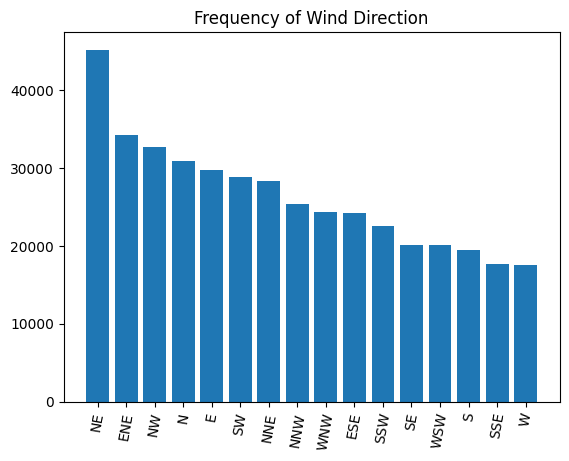

In [79]:
wd_counts = cleaned_df['wd'].value_counts()

plt.bar(wd_counts.index, wd_counts.values)
plt.title('Frequency of Wind Direction')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=80)
plt.show()

**Insights:**

* Data didominasi oleh arah angin NE (northeast) → timur laut, dengan jumlah pencatatan lebih dari 40.000.
* Arah angin terbanyak kedua berasal dari ENE (east-northeast) → timur-timur laut.
* Arah angin ketiga berasal dari NW (northwest) → barat laut, dengan jumlah pencatatan lebih dari 30.000. Namun, selisihnya dengan arah ENE tidak terlalu signifikan.
* Selanjutnya, arah angin yang paling sering tercatat adalah N (north) → utara, E (east) → timur, SW (southwest) → barat daya, dan seterusnya.
* Arah angin dengan jumlah pencatatan terendah adalah W (west) → barat.
* Menurut Turyanti, A. (2011), penyebaran konsentrasi polutan (PM2.5 dan PM10) di suatu daerah sangat dipengaruhi oleh arah angin. Berdasarkan grafik batang ini, polutan cenderung terbawa ke tiga arah utama, yaitu timur laut (NE), timur-timur laut (ENE), dan barat laut (NW).

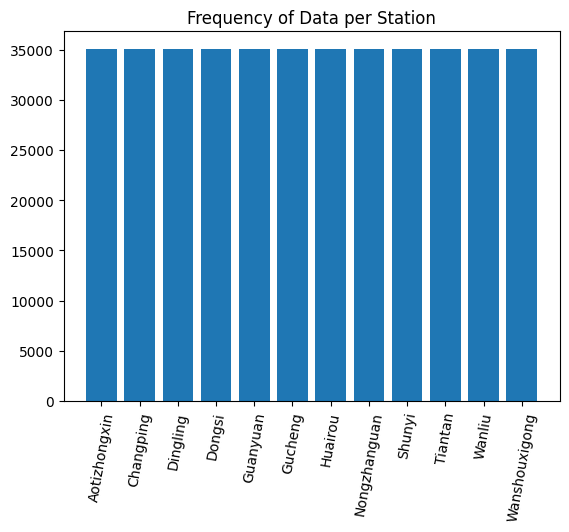

In [80]:
station_counts = cleaned_df['station'].value_counts()

plt.bar(station_counts.index, station_counts.values)
plt.title('Frequency of Data per Station')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=80)
plt.show()

**Insight**:
* Visualisasi ini menunjukkan banyaknya data yang tercatat dalam setiap stasiun dan setiap stasiun memiliki banyaknya data yang sama, yaitu 35.000 baris.

Univariate analysis dengan data numerik

In [81]:
numeric_cols = cleaned_df.select_dtypes(exclude='object').columns

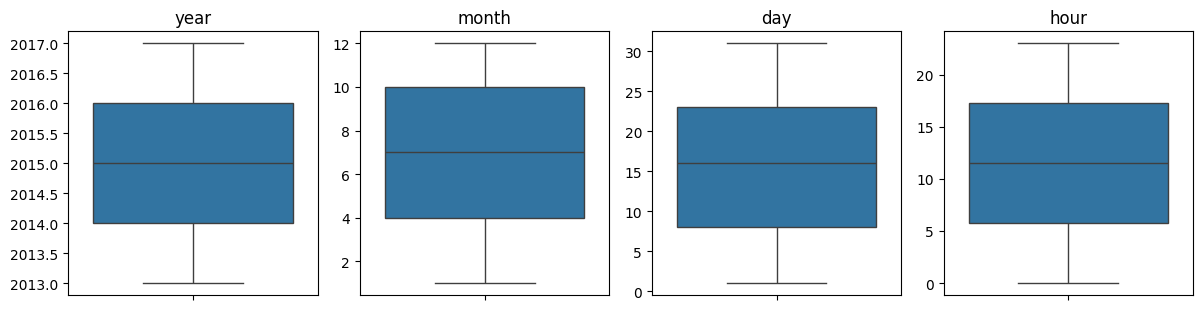

In [82]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:4]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=cleaned_df[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights**
* `year`: Dalam dataset, tahun yang tercatat dari 2013 hingga 2017.
* `month`: Bulan yang tercatat dari Januari hingga Desember. 
* `day`: Hari yang tercatat dari hari ke-0 hingga akhir bulan.
* `hour`: Jam tercatat dari jam ke-0 hingga akhir hari.

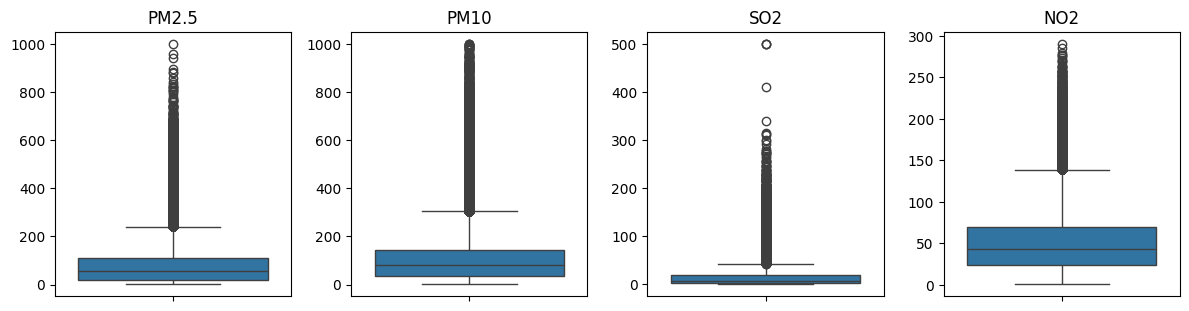

In [83]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[4:8]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=cleaned_df[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights:**

- `PM2.5`: Rata-rata konsentrasi polutan berada di bawah 100 µg/m³. Data yang melebihi konsentrasi sekitar 230 µg/m³ dianggap sebagai outlier. Kepadatan titik data di area outlier menunjukkan banyaknya pencatatan dalam kategori ini, yang dapat mempengaruhi distribusi data dan menyebabkan distribusi menjadi asimetris.  
- `PM10`: Rata-rata konsentrasi polutan berada di sekitar 100 µg/m³, dengan data di atas 300 µg/m³ dianggap sebagai outlier. Kepadatan data pada nilai tinggi menunjukkan banyaknya pencatatan sebagai outlier, dengan nilai maksimum mencapai sekitar 1000 µg/m³.  
- `SO2`: Rata-rata konsentrasi polutan berada di sekitar 10 µg/m³. Data yang melebihi 50 µg/m³ dianggap sebagai outlier, dengan nilai maksimum outlier mencapai 500 µg/m³.  
- `NO2`: Rata-rata konsentrasi berada di sekitar 50 µg/m³. Banyak data yang tercatat sebagai outlier di atas 149 µg/m³, menunjukkan adanya penyimpangan signifikan pada polutan ini.  
- Secara keseluruhan, keberadaan outlier yang cukup banyak pada beberapa variabel menunjukkan bahwa distribusi data polutan tidak simetris. Outlier ini tidak akan dihapus karena analisis akan berfokus pada lonjakan polutan yang terjadi serta dampaknya.

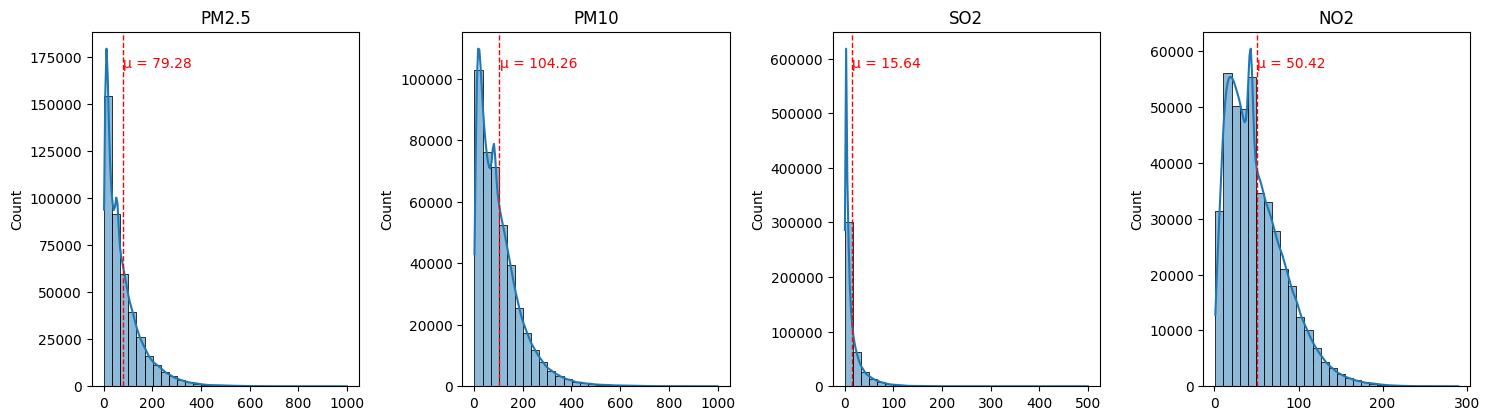

In [84]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[4:8]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(cleaned_df[col], kde=True, bins=30) 
    plt.axvline(cleaned_df[col].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.text(cleaned_df[col].mean()*1.01, plt.ylim()[1] * 0.9, f'μ = {cleaned_df[col].mean():.2f}', color='r')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

**Insights**:
* Seluruh variabel atau features menunjukkan distribusi right-skewed (condong ke kanan) atau terkonsentrasi di sisi kiri. Hal ini menandakan bahwa mayoritas data berada pada nilai kecil, sementara jumlah data semakin berkurang seiring dengan meningkatnya nilai polutan. Distribusi ini juga mengindikasikan bahwa mean lebih besar dari median (mean > median).

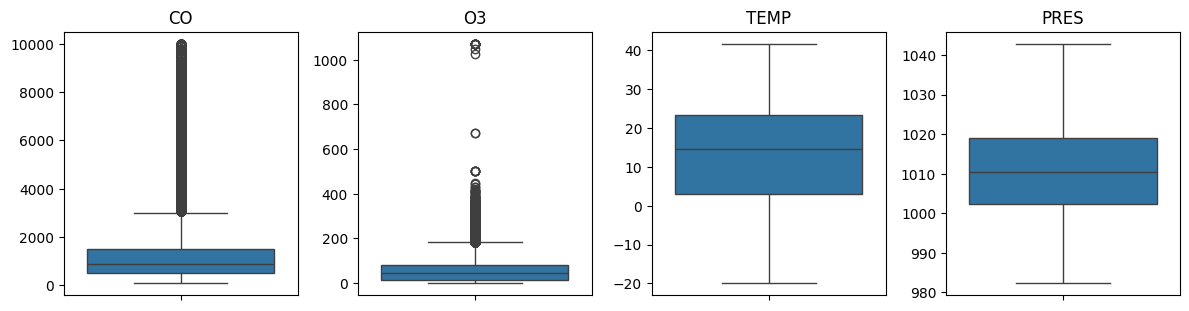

In [85]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[8:12]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=cleaned_df[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights**:
- `CO`: Data memiliki rata-rata di sekitar 1000 mg/m³, dan ketika data melebihi 3000 mg/m³, maka data tersebut dianggap sebagai outlier. Kepadatan data yang terlihat dalam outlier menandakan bahwa banyak data yang tercatat termasuk dalam kategori outlier.  
- `O3`: Rata-rata terlihat berada di bawah 50 ppm, sementara nilai di atas 200 ppm dinyatakan sebagai outlier. Terlihat bahwa terdapat jarak antar outlier yang menandakan variasi data dan outlier terkonsentrasi di sekitar area di bawah 50 ppm.  
- `TEMP`: Rata-rata berada di sekitar 14°C, dengan nilai minimum mendekati -20°C dan nilai maksimum di sekitar 40°C. Tidak terlihat adanya outlier dalam data.  
- `PRES`: Rata-rata terlihat di sekitar 1000 hPa, dengan nilai minimum tercatat di sekitar 980 hPa dan nilai maksimum di sekitar 1040 hPa. Tidak ada *outlier* yang terlihat.

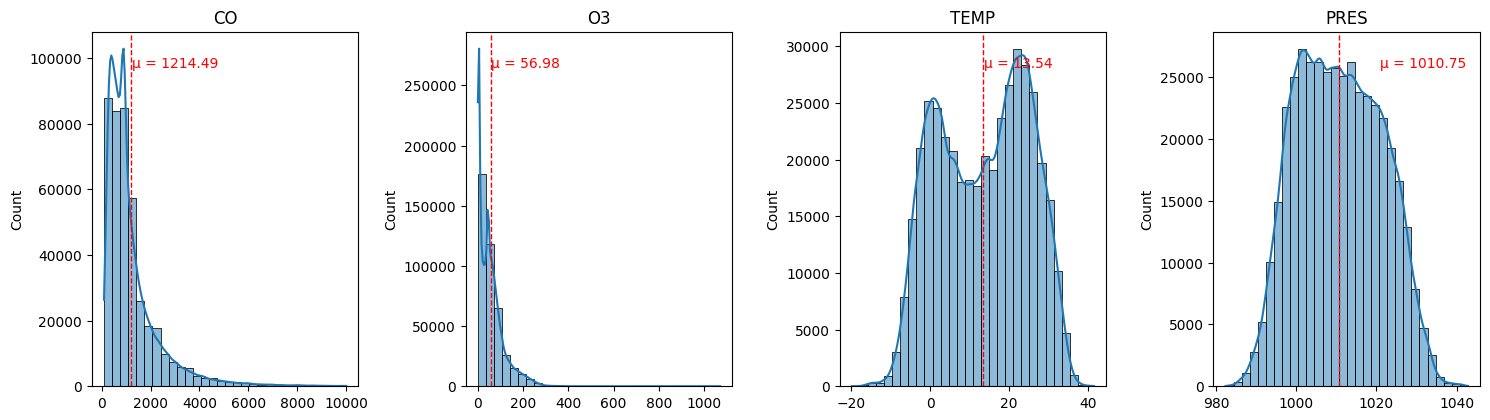

In [86]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[8:12]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(cleaned_df[col], kde=True, bins=30) 
    plt.axvline(cleaned_df[col].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.text(cleaned_df[col].mean()*1.01, plt.ylim()[1] * 0.9, f'μ = {cleaned_df[col].mean():.2f}', color='r')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

**Insights**:
- Variabel CO dan O3 menunjukkan distribusi right-skewed (condong ke kanan) atau terkonsentrasi di sisi kiri. Hal ini menunjukkan bahwa mayoritas data berada pada nilai kecil, sementara jumlah data semakin berkurang seiring dengan meningkatnya nilai polutan. Distribusi ini juga mengindikasikan bahwa mean lebih besar dari median (mean > median).  
- Variabel TEMP menunjukkan pola distribusi berbentuk U (U-shaped distribution) atau bimodal distribution, di mana data tampak memiliki dua puncak, yaitu di sekitar 0 °C dan sekitar 30 °C.  
- Variabel PRES memiliki distribusi yang hampir menyerupai distribusi normal.

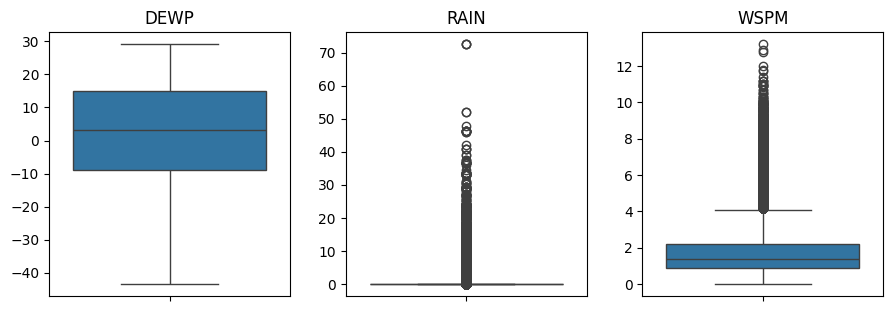

In [87]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[12:]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=cleaned_df[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Insights**:
* `DEWP`: Rata-rata titik embun yang tercatat berada di sekitar 0 °C, dengan nilai minimum sekitar -40 °C dan nilai maksimum sekitar 30 °C. Tidak ada outlier yang terlihat.  
* `RAIN`: Rata-rata berada di sekitar 0 mm. Area outlier mungkin berada di sekitar 1 mm, menunjukkan bahwa dalam data yang tercatat, hujan sangat jarang terjadi. Outlier terkonsentrasi di bawah area 40 mm.  
* `WSPM`: Rata-rata kecepatan angin yang tercatat berada di sekitar 1 m/s, dengan nilai minimum sekitar 0 m/s dan maksimum sekitar 4 m/s. Kecepatan angin yang melebihi 4 m/s dikategorikan sebagai outlier, dengan outlier terkonsentrasi di bawah 11 m/s. Hal ini menunjukkan bahwa angin jarang sekali bertiup sangat kencang.

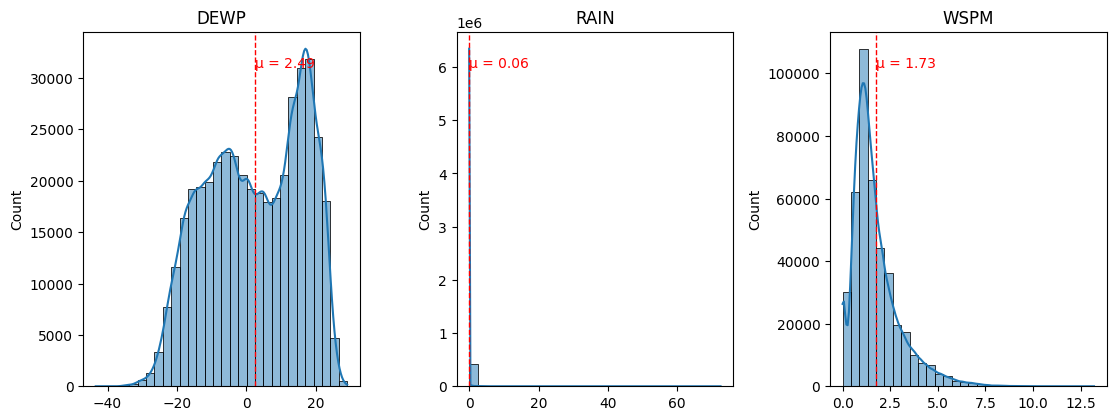

In [88]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[12:]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(cleaned_df[col], kde=True, bins=30) 
    plt.axvline(cleaned_df[col].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.text(cleaned_df[col].mean()*1.01, plt.ylim()[1] * 0.9, f'μ = {cleaned_df[col].mean():.2f}', color='r')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

**Insights:**
* Seluruh variabel menunjukkan bahwa tidak ada yang berdistribusi normal. DEWP memiliki distribusi yang hampir bimodal, RAIN cenderung terkonsentrasi di sekitar 0 dengan sebaran jarang di area lain serta rentang outlier hingga 70, sedangkan WSPM menunjukkan distribusi yang right-skewed.

# **Visualization**

##### **Question 1:** Analisislah korelasi yang terjadi antara faktor meteorologis dengan berbagai polutan dan partikelnya

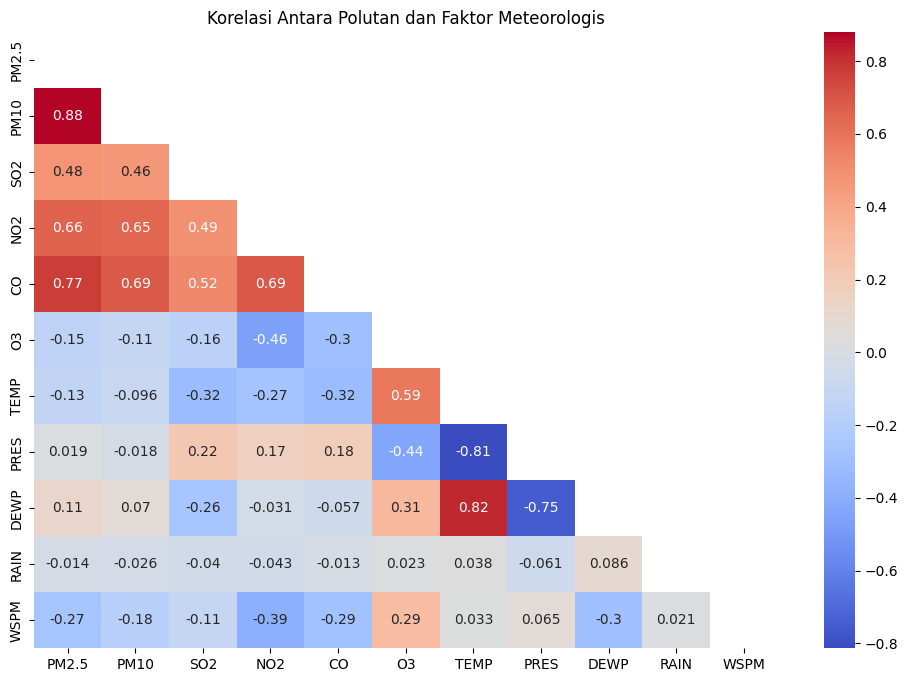

In [89]:
corr_matrix = cleaned_df[numeric_cols[4:]].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask) 
plt.title('Korelasi Antara Polutan dan Faktor Meteorologis')
plt.show()

**Insights**:  
* **Antar Polutan**  
    * PM2.5, PM10, SO2, dan NO2 memiliki korelasi yang cukup kuat dengan variabel CO, dengan nilai berturut-turut: 0.77, 0.69, 0.52, dan 0.69. Hal ini menandakan bahwa variabel CO memiliki keterkaitan dalam peningkatan partikel maupun konsentrasi polutan lainnya.  
    * PM2.5, PM10, dan SO2 memiliki korelasi yang cukup signifikan terhadap variabel NO2, dengan nilai berturut-turut: 0.66, 0.65, dan 0.49. Hal ini menunjukkan bahwa variabel NO2 berkontribusi dalam peningkatan konsentrasi partikel polutan lainnya.  
    * PM2.5 dan PM10 memiliki korelasi yang mirip terhadap SO2, dengan nilai 0.48 dan 0.46, yang menunjukkan bahwa polutan SO2 memiliki pengaruh terhadap partikel polutan lainnya.  
    * Korelasi antar polutan tertinggi ditunjukkan antara PM2.5 dan PM10, yaitu 0.88, yang menunjukkan bahwa kedua variabel ini memiliki keterkaitan yang sangat erat.  

* **Polutan vs Faktor Meteorologis**  
    * Variabel O3 memiliki korelasi yang cukup kuat dengan TEMP, yaitu sebesar 0.59. Hal ini sesuai dengan kenyataan bahwa peningkatan suhu bumi atau pemanasan global dapat menyebabkan penipisan lapisan ozon.  
    * Variabel O3 juga memiliki korelasi dengan DEWP (titik embun) dan WSPM (kecepatan angin), yang menandakan bahwa menipisnya lapisan ozon berkaitan dengan kondisi atmosfer. Jika suatu wilayah terlalu gersang, maka penyebaran partikel polutan akan lebih mudah terjadi.  
    * Variabel SO2, NO2, dan CO memiliki relasi dengan PRES (tekanan), yang menunjukkan bahwa polutan dipengaruhi oleh tekanan udara di suatu wilayah.  

* **Antar Faktor Meteorologis**  
    * TEMP memiliki korelasi yang tinggi dengan DEWP (titik embun), yaitu sebesar 0.82, serta korelasi negatif dengan PRES (tekanan), yaitu sebesar -0.81. Hal ini menunjukkan bahwa ketika suhu udara meningkat, titik embun juga cenderung meningkat, berbanding terbalik ketika titik embun meningkat maka tekanan udara cenderung menurun.  
    * PRES memiliki korelasi negatif dengan DEWP, yaitu sebesar -0.75, karena peningkatan titik embun biasanya terjadi saat tekanan udara lebih rendah.  

**Question 2:** Analisislah hubungan linear antara faktor meteorologis dengan konsentrasi PM2.5 dan PM10

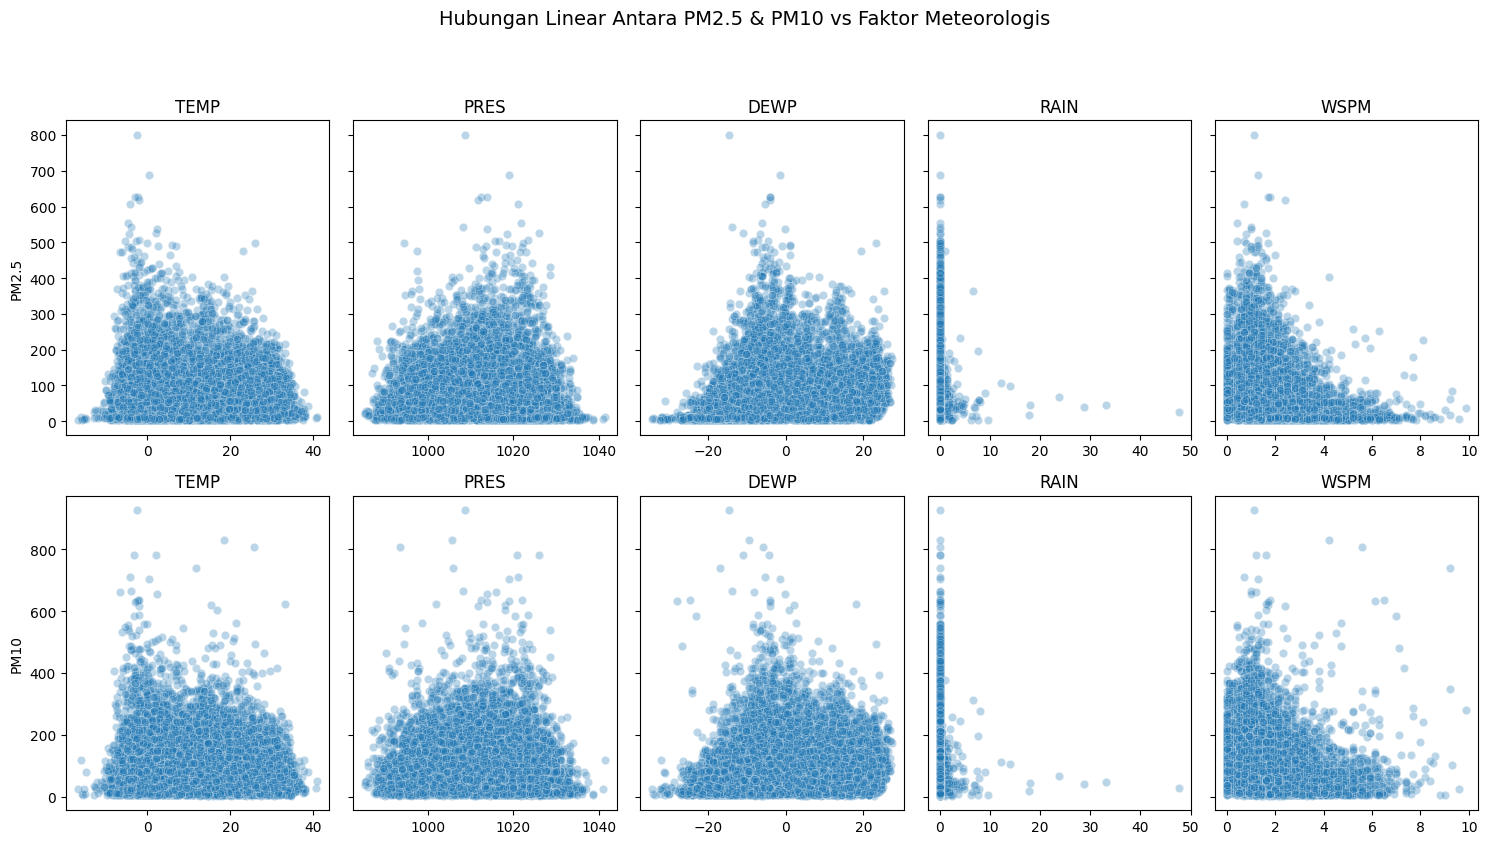

In [90]:
# karena total keseluruhan data 420k++ maka digunakan sampel acak agar proses visualisasi lebih cepat
selected_features = ['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
sampled_df = cleaned_df[selected_features].sample(n=10000, random_state=42)

meteorology_vars = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
pollutants = ['PM2.5', 'PM10']

# buat figure dan axes dengan 2 baris (PM2.5 & PM10) dan kolom sesuai jumlah variabel meteorologi
fig, axes = plt.subplots(nrows=2, ncols=len(meteorology_vars), figsize=(15, 8), sharey='row')
for i, pol in enumerate(pollutants):
    for j, met in enumerate(meteorology_vars):
        ax = axes[i, j]
        sns.scatterplot(data=sampled_df, x=met, y=pol, alpha=0.3, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel(pol if j == 0 else '')
        ax.set_title(met)

plt.suptitle('Hubungan Linear Antara PM2.5 & PM10 vs Faktor Meteorologis', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

**Insights**:
* Korelasi linear tampak antara PM2.5 dan PM10 dengan DEWP. Korelasi ini memiliki kecenderungan korelasi linear positif, dalam scatter plot terlihat bahwa ada pola linear seiring meningkatnya titik embun yang mempengaruhi konsentrasi partikel polutan PM2.5 dan PM10. Namun, dari scatter plot terlihat juga bahwa nilai terkonsentrasi di bawah area 400 µg/m³ dalam kedua partikel polutan, di mana peningkatan titik embun dapat mempengaruhi proses kondensasi dan adsorpsi partikel polutan di udara.  
* Korelasi linear juga tampak antara PM2.5 dan PM10 dengan WSPM. Korelasi ini termasuk korelasi linear negatif, dan dalam scatter plot terlihat bahwa semakin meningkatnya kecepatan angin, semakin sedikit partikel polutan yang terbawa. Faktor meteorologi yang berpengaruh langsung terhadap penyebaran polutan adalah angin (meliputi arah dan kecepatan) serta stabilitas atmosfer. Dispersi polutan dipengaruhi oleh angin yang menentukan arah dan seberapa tinggi konsentrasi polutan di daerah tersebut. Arah angin menentukan daerah paparan, sedangkan kecepatan angin menentukan seberapa jauh pencemar akan terbawa sepanjang arah angin dominan. Menurut hasil penelitian Hakiki (2008), peningkatan kecepatan angin akan menyebabkan pencemar lebih mudah menyebar, sehingga konsentrasinya lebih rendah pada area yang lebih jauh dari sumber pencemar.

**Question 3:** Bagaimanakah rata-rata tahunan PM2.5 dan PM10 selama 5 tahun terakhir?

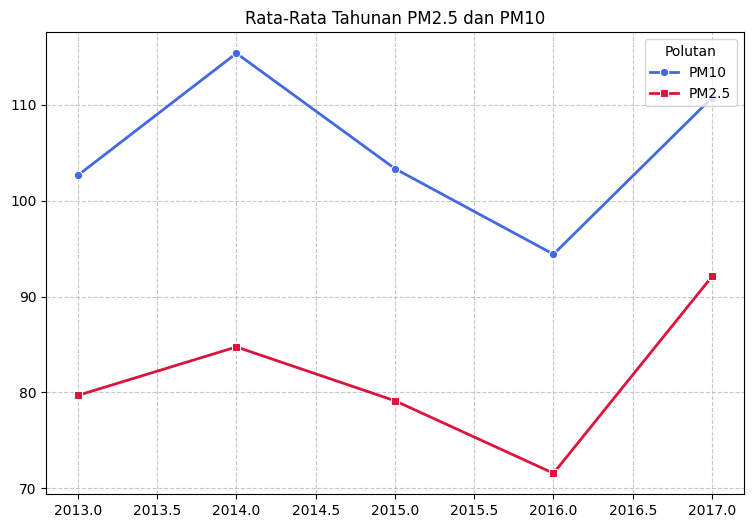

In [ ]:
df_resampled1 = cleaned_df[['PM10', 'PM2.5']].resample('Y').mean()
df_yearly_avg = df_resampled1.groupby(df_resampled1.index.year).mean()

plt.figure(figsize=(9, 6))
# plot garis untuk PM10
sns.lineplot(
    x=df_yearly_avg.index, 
    y=df_yearly_avg['PM10'], 
    marker='o', 
    color='royalblue', 
    linewidth=2,
    label='PM10'
)

# plot garis untuk PM2.5
sns.lineplot(
    x=df_yearly_avg.index, 
    y=df_yearly_avg['PM2.5'], 
    marker='s', 
    color='crimson', 
    linewidth=2,
    label='PM2.5'
)
plt.xlabel('')
plt.ylabel('')
plt.title('Rata-Rata Tahunan PM2.5 dan PM10')
plt.legend(title='Polutan', loc='upper right')
plt.ylim(0, None)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insights**:
* Partikel polutan PM2.5 dan PM10 mengalami fluktuasi signifikan dari tahun ke tahun. Terlihat lonjakan rata-rata konsentrasi kedua polutan pada tahun 2014 dibandingkan dengan 2013, yang kemudian diikuti oleh tren penurunan hingga mencapai titik terendah pada 2016. Namun, pada 2017, terjadi peningkatan kembali dalam konsentrasi PM2.5 dan PM10, meskipun pencatatan data di tahun tersebut baru mencakup hingga bulan Februari. Hal ini dapat mengindikasikan adanya faktor musiman atau perubahan aktivitas industri dan lingkungan yang memengaruhi kadar polutan di udara.

**Question 4:** Tunjukkan rata-rata bulanan konsentrasi PM2.5 dan PM10 dalam kurun waktu 5 tahun (2013 - 2017)

In [92]:
df_resampled2 = cleaned_df[['PM10', 'PM2.5']].resample('M').mean()

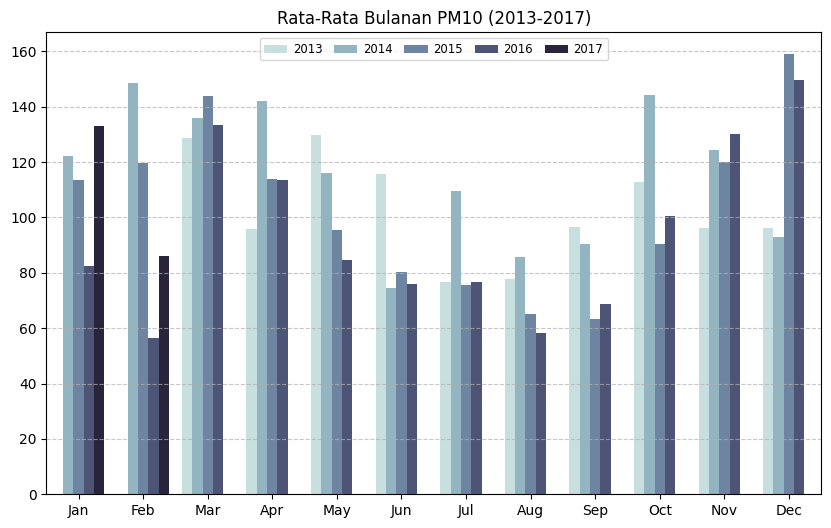

In [93]:
colors = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_resampled2[['PM10']], 
    x=df_resampled2.index.month, y='PM10', hue=df_resampled2.index.year, 
    palette=colors,  
    dodge=True  
)

plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('')
plt.ylabel('')
plt.title('Rata-Rata Bulanan PM10 (2013-2017)')
plt.legend(loc='upper center', ncol=5, fontsize='small', columnspacing=1.0, handletextpad=0.5)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

**Insights**:  
* Dari rata-rata konsentrasi PM10 yang tercatat dalam rentang tahun 2013–2017, terlihat adanya pola musiman atau tren bulanan. Konsentrasi PM10 mengalami peningkatan pada bulan Februari hingga Maret, kemudian mengalami penurunan bertahap dari April hingga Agustus. Setelah periode penurunan tersebut, terjadi kembali peningkatan mulai bulan Oktober, dengan lonjakan tertinggi terjadi pada bulan Desember.  
* Pola ini dapat mengindikasikan adanya faktor musiman yang memengaruhi tingkat polusi udara, seperti perubahan cuaca, pola curah hujan, atau aktivitas manusia tertentu yang meningkat pada bulan-bulan tertentu. Misalnya, peningkatan konsentrasi PM10 pada akhir tahun mungkin berkaitan dengan peningkatan aktivitas industri, pembakaran biomassa, atau faktor meteorologi seperti kelembaban, dan kecepatan angin yang memengaruhi penyebaran polutan di udara.

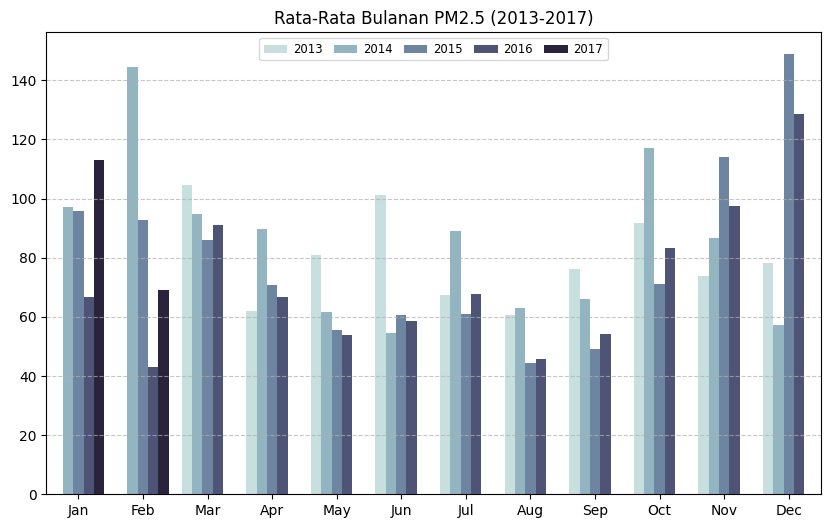

In [94]:
colors = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_resampled2[['PM2.5']], 
    x=df_resampled2.index.month, y='PM2.5', hue=df_resampled2.index.year, 
    palette=colors,  
    dodge=True  
)

plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('')
plt.ylabel('')
plt.title('Rata-Rata Bulanan PM2.5 (2013-2017)')
plt.legend(loc='upper center', ncol=5, fontsize='small', columnspacing=1.0, handletextpad=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights**:  
* Berdasarkan rata-rata konsentrasi PM2.5 dalam rentang tahun 2013–2017, terdapat pola musiman atau tren bulanan yang cukup jelas. Konsentrasi PM2.5 cenderung meningkat pada Februari atau Maret, kemudian perlahan menurun hingga Agustus. Setelah fase penurunan ini, terjadi kenaikan kembali mulai Oktober, dengan puncak tertinggi pada Desember.  
* Pola ini menunjukkan bahwa faktor musiman berperan dalam fluktuasi tingkat polusi udara, dipengaruhi oleh perubahan kondisi cuaca, curah hujan, atau aktivitas manusia tertentu pada bulan-bulan tertentu. Misalnya, peningkatan konsentrasi PM2.5 menjelang akhir tahun kemungkinan berkaitan dengan intensifikasi aktivitas industri, pembakaran biomassa, atau faktor meteorologi seperti kelembapan dan kecepatan angin yang berpengaruh terhadap pergerakan polutan di atmosfer.

# **Advance Analysis**

**Question 5:** Bagaimanakah kategori udara berdasarkan konsentrasi PM2.5 dan PM10?

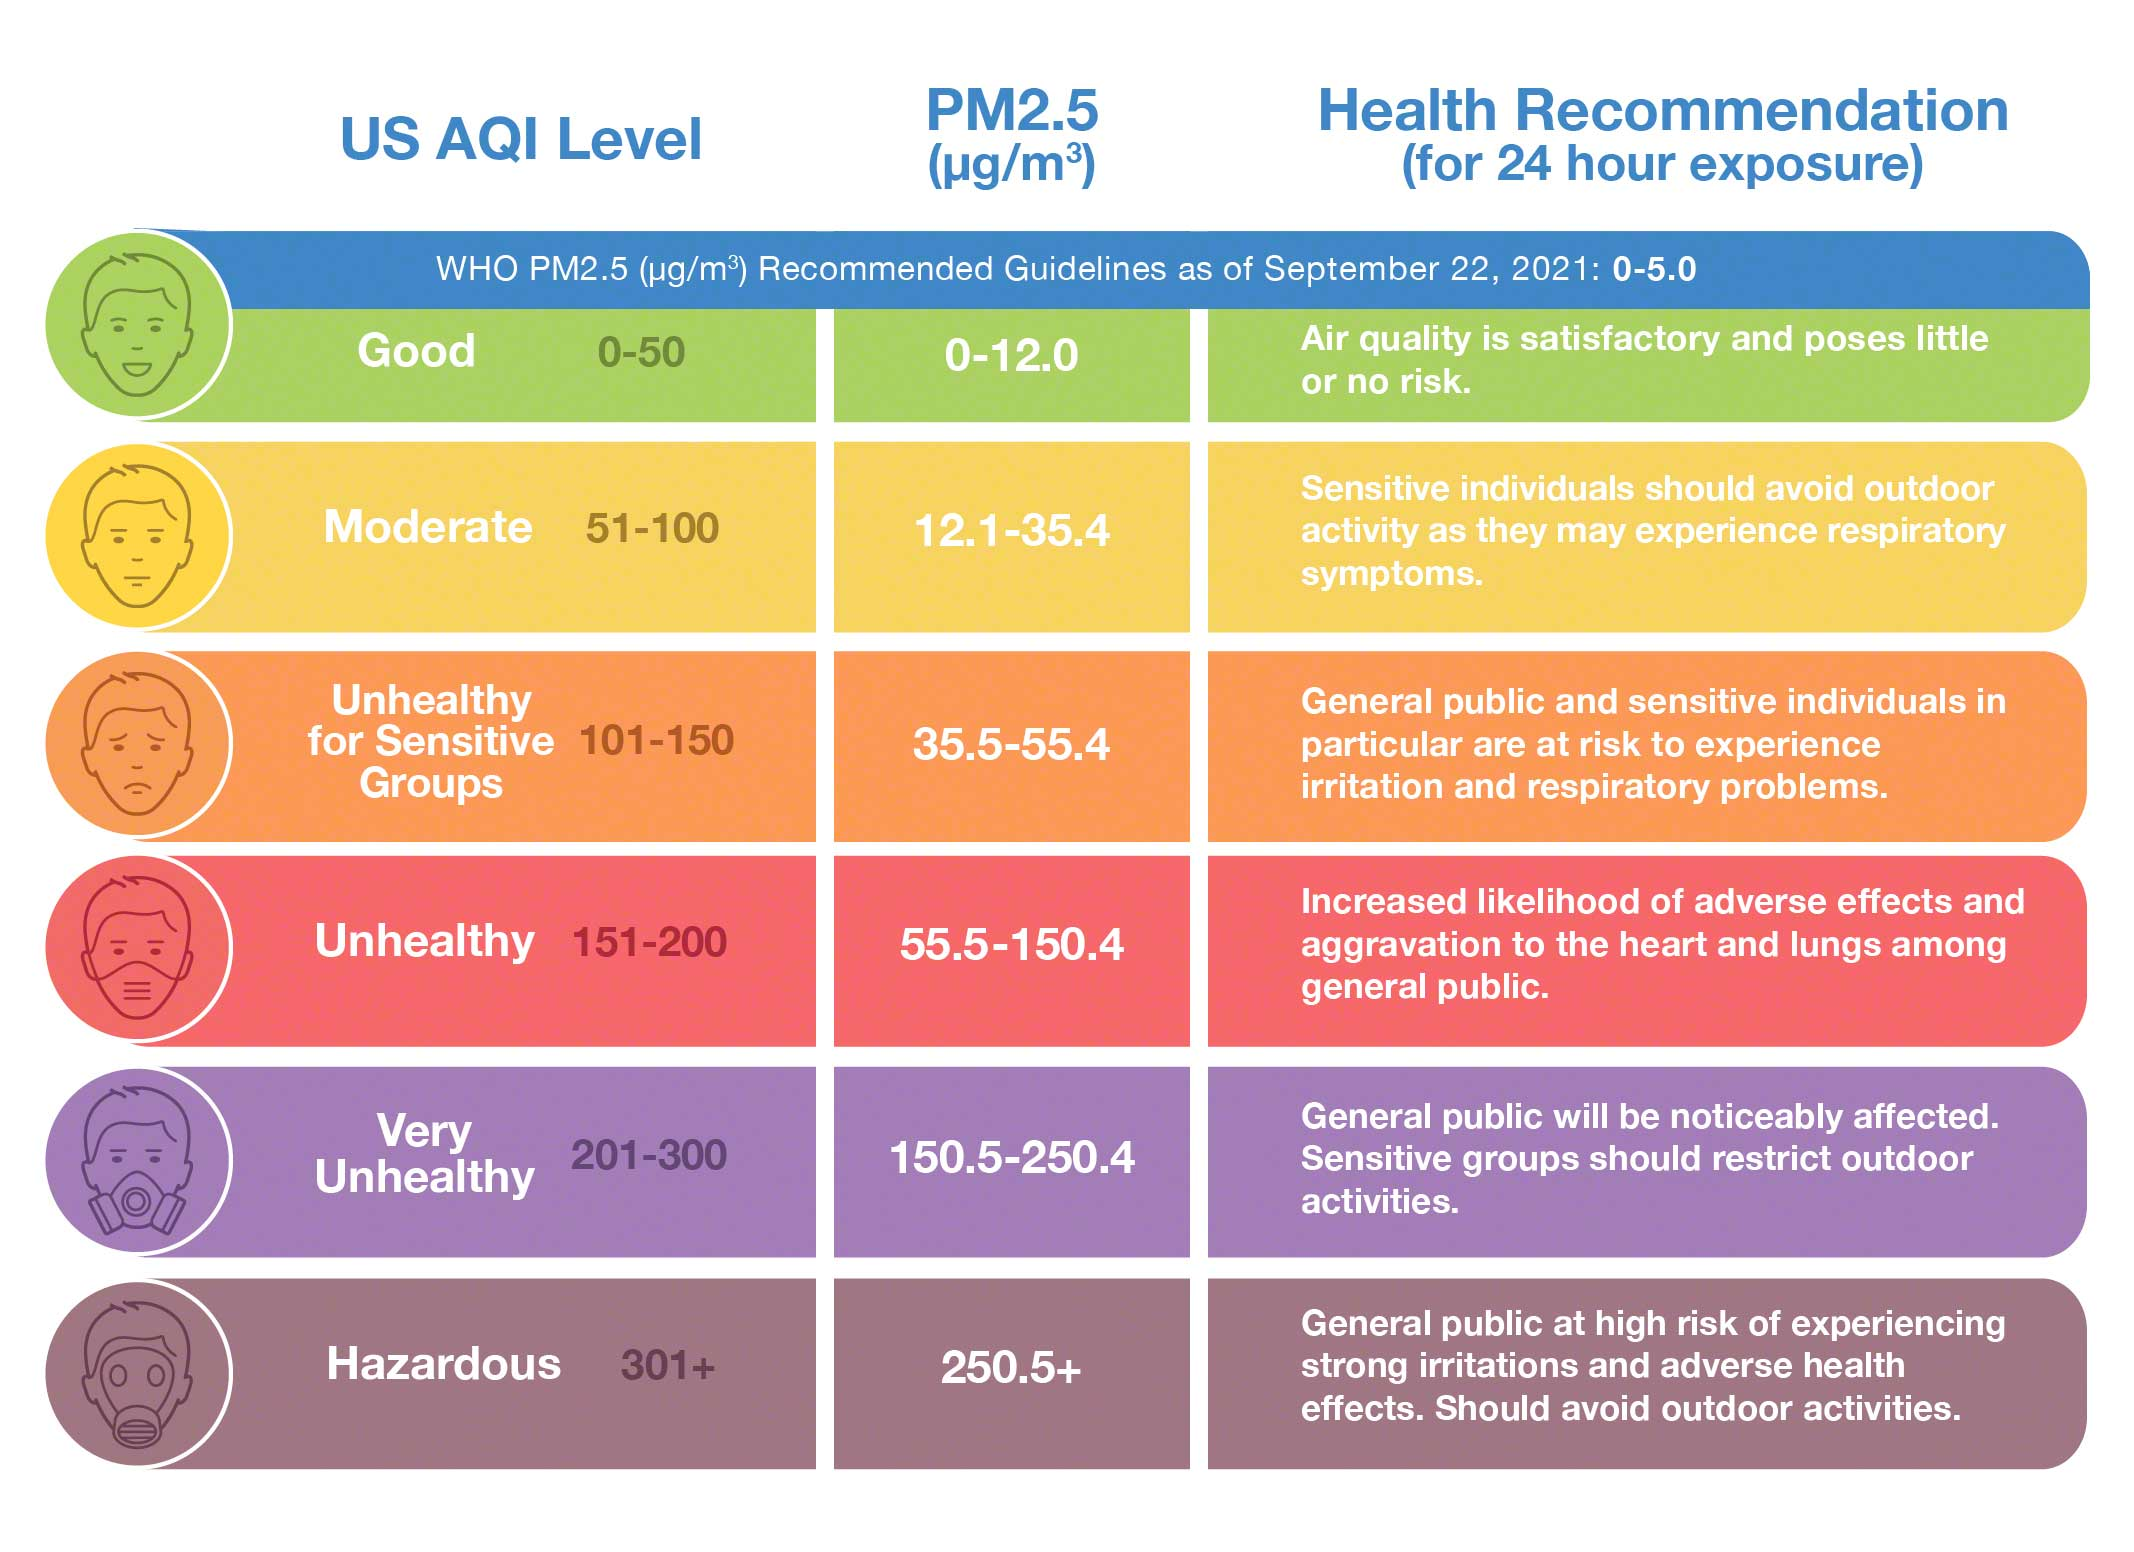

In [95]:
bins = [0, 12, 35, 55, 150, 250, float('inf')]  
labels = ['Baik', 'Sedang', 'Tidak Sehat bagi Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']

In [96]:
cleaned_df['air_category_pm2_5'] = pd.cut(cleaned_df['PM2.5'], bins=bins, labels=labels)
cleaned_df['air_category_pm10'] = pd.cut(cleaned_df['PM10'], bins=bins, labels=labels)

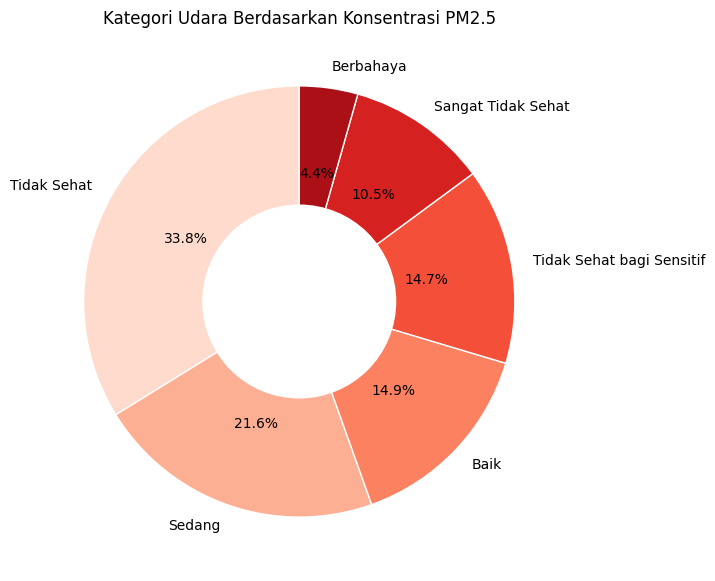

In [97]:
air_category_counts = cleaned_df['air_category_pm2_5'].value_counts()
colors = sns.color_palette('Reds', len(air_category_counts))

plt.figure(figsize=(7, 7))

# buat pie chart dengan tengah kosong untuk efek donat
plt.pie(
    air_category_counts, labels=air_category_counts.index, autopct='%1.1f%%',
    startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
# menambahkan lingkaran putih di tengah untuk membuat efek donat
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Kategori Udara Berdasarkan Konsentrasi PM2.5')
plt.show()


**Insights:**  
* Berdasarkan hasil pencatatan konsentrasi PM2.5 tiap jam, kategori udara yang paling sering terjadi adalah "tidak sehat" dengan persentase sebesar 33.8%, diikuti oleh "sedang" dengan 21.6%, "baik" 14.9%, "tidak sehat bagi kelompok sensitif" 14.7%, serta "sangat tidak sehat" dan "berbahaya" dalam persentase yang lebih kecil.  
* Dalam kurun waktu 5 tahun (2013–2017) dan berdasarkan pengukuran di 12 stasiun, hasil pencatatan menunjukkan bahwa kualitas udara sering kali berada pada tingkat yang tidak sehat untuk dihirup langsung. Hal ini menandakan bahwa partikel PM2.5 berpotensi membahayakan kesehatan dan dapat meningkatkan risiko gangguan pernapasan.  

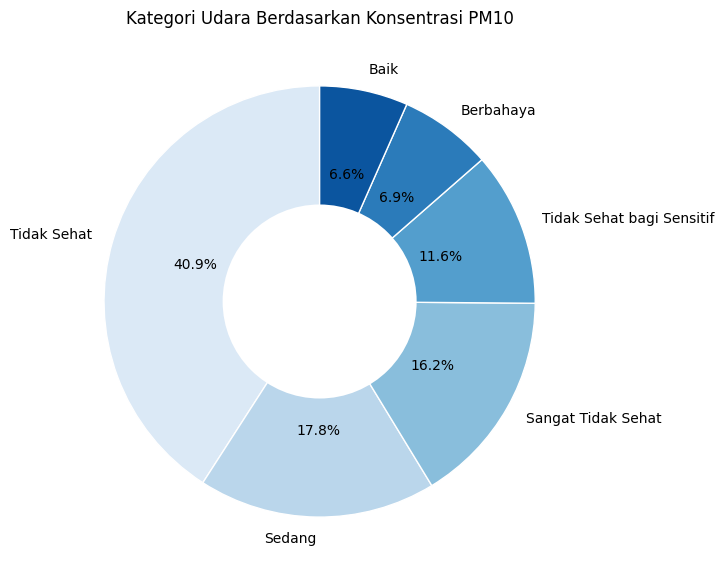

In [ ]:
air_category_counts = cleaned_df['air_category_pm10'].value_counts()
colors = sns.color_palette('Blues', len(air_category_counts))

plt.figure(figsize=(7, 7))

# buat pie chart dengan tengah kosong untuk efek donat
plt.pie(
    air_category_counts, labels=air_category_counts.index, autopct='%1.1f%%',
    startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
# menambahkan lingkaran putih di tengah untuk membuat efek donat
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Kategori Udara Berdasarkan Konsentrasi PM10')
plt.show()

**Insights:**  
* Berdasarkan hasil pencatatan konsentrasi PM10 tiap jam, kategori kualitas udara yang paling sering terjadi adalah "tidak sehat" dengan persentase sebesar 40,9%, diikuti oleh "sedang" sebesar 17,8%, "sangat tidak sehat" sebesar 16,2%, serta "tidak sehat bagi kelompok sensitif", "baik", dan "berbahaya" dalam persentase yang lebih kecil.  
* Dalam kurun waktu 5 tahun (2013–2017) dan berdasarkan pengukuran di 12 stasiun, hasil pencatatan menunjukkan bahwa kualitas udara sering kali berada pada tingkat yang tidak sehat untuk dihirup langsung. Hal ini menandakan bahwa partikel PM10 berpotensi membahayakan kesehatan dan meningkatkan risiko gangguan pernapasan. Jika dibandingkan, kategori kualitas udara yang lebih sering muncul akibat konsentrasi PM10 cenderung menunjukkan tingkat "tidak sehat", yang mengindikasikan bahwa PM10 dapat lebih berbahaya dibandingkan PM2.5.

**Question 6:** Stasiun manakah yang memiliki kategori sangat tidak sehat dan berbahaya terbanyak?

In [99]:
# filter berdasarkan kategori yang lebih buruk dari "tidak sehat"
kategori_buruk = ['Sangat Tidak Sehat', 'Berbahaya'] 

filtered_df = cleaned_df[
    (cleaned_df['air_category_pm2_5'].isin(kategori_buruk)) | 
    (cleaned_df['air_category_pm10'].isin(kategori_buruk))
]

# group by setelah filtering
station_count = filtered_df.groupby('station').size().reset_index(name='count')
station_count = station_count.sort_values(by='count', ascending=False).reset_index(drop=True)
station_count

station  count
0         Gucheng  10595
1          Wanliu   9192
2   Wanshouxigong   9138
3    Aotizhongxin   9091
4          Dongsi   8883
5    Nongzhanguan   8685
6        Guanyuan   8657
7         Tiantan   8058
8          Shunyi   7622
9       Changping   6842
10        Huairou   6638
11       Dingling   5805

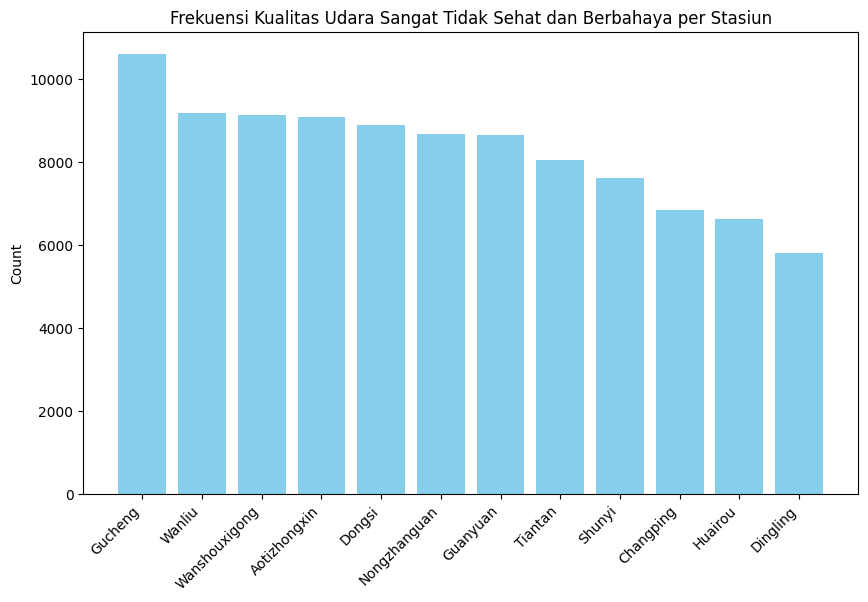

In [ ]:
# plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(station_count['station'], station_count['count'], color='skyblue')
plt.xlabel('')
plt.ylabel('Count')
plt.title('Frekuensi Kualitas Udara Sangat Tidak Sehat dan Berbahaya per Stasiun')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight**:
* Stasiun dengan kategori udara sangat tidak sehat dan berbahaya adalah Gucheng, Wanliu, Wanshouxigong, Aotizhongxin, dan Dongsi.

**Question 7:** Kapan kualitas udara dengan konsentrasi PM2.5 dan PM10 berada pada level yang tidak sehat bagi kesehatan?

In [101]:
cleaned_df['time_category'] = cleaned_df['hour'].apply(
    lambda x: 'Dini Hari' if 0 <= x <= 3 else
              'Pagi' if 4 <= x <= 9 else
              'Siang' if 10 <= x <= 14 else
              'Sore' if 15 <= x <= 17 else
              'Malam'
)

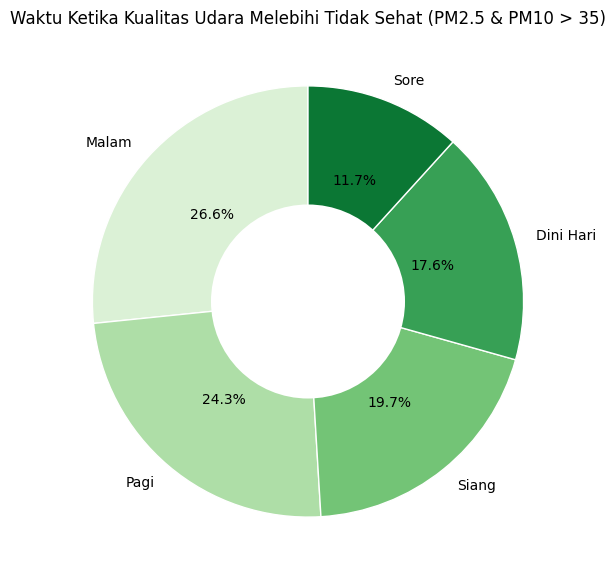

In [102]:
# filter data sesuai kondisi
filtered_df = cleaned_df[(cleaned_df['PM2.5'] > 35) & (cleaned_df['PM10'] > 35)]

# hitung jumlah kategori waktu
time_category_counts = filtered_df['time_category'].value_counts()

colors = sns.color_palette('Greens', len(time_category_counts))
plt.figure(figsize=(7, 7))
# buat pie chart dengan tengah kosong untuk efek donut
plt.pie(
    time_category_counts, labels=time_category_counts.index, autopct='%1.1f%%',
    startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# menambahkan lingkaran putih di tengah untuk membuat efek donut
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Waktu Ketika Kualitas Udara Melebihi Tidak Sehat (PM2.5 & PM10 > 35)')
plt.show()

**Insights**:  
* Kualitas udara yang mulai tidak baik bagi kelompok sensitif hingga mencapai kategori berbahaya lebih sering terjadi pada malam hari, diikuti oleh pagi dan siang hari. Berdasarkan output dari multivariate analysis dengan heatmap maka: 
  - Pada malam hari, kondisi atmosfer cenderung stabil dengan suhu yang lebih rendah dan kecepatan angin yang lebih lemah. Hal ini menyebabkan polutan seperti PM2.5, PM10, CO, dan NO2 terperangkap di lapisan udara yang lebih dekat ke permukaan tanah, sehingga akan meningkatkan konsentrasinya dan mempengaruhi kualitas udara.  
  - Pada pagi hari, peningkatan aktivitas manusia seperti lalu lintas kendaraan bermotor, pembakaran biomassa, serta aktivitas industri dan pabrik mulai berkontribusi terhadap peningkatan kadar polutan. Selain itu, kondisi embun (DEWP) yang tinggi di pagi hari dapat memperburuk penumpukan polutan.  
  - Pada siang hari, meskipun aktivitas industri dan transportasi masih tinggi, meningkatnya suhu udara (TEMP) dan kecepatan angin (WSPM) dapat membantu menyebarkan polutan ke lapisan atmosfer yang lebih tinggi, mengurangi konsentrasi di dekat permukaan. Namun, peningkatan suhu juga dapat mempercepat reaksi kimia yang menghasilkan ozon (O3), yang dapat berkontribusi terhadap penurunan kualitas udara.  

# **Conclusion:**

* Conclusion pertanyaan 1: Faktor meteorologis memiliki hubungan yang erat dengan polutan seperti PM2.5, PM10, CO, SO2, dan NO2. CO menunjukkan korelasi kuat dengan PM2.5 (0.77), PM10 (0.69), SO2 (0.52), dan NO2 (0.69), menunjukkan bahwa CO berperan dalam peningkatan polusi udara. NO2 juga memiliki hubungan signifikan dengan PM2.5 (0.66), PM10 (0.65), dan SO2 (0.49), mengindikasikan bahwa NO2 berkontribusi pada peningkatan polutan lainnya. Faktor meteorologis seperti tekanan udara (PRES) juga berpengaruh terhadap polutan, di mana peningkatan tekanan udara berkaitan dengan perubahan kadar SO2, NO2, dan CO.

* Conclusion pertanyaan 2: Korelasi linear positif terlihat antara PM2.5 dan PM10 dengan DEWP, menunjukkan bahwa titik embun mempengaruhi konsentrasi polutan. Scatter plot menunjukkan pola linear dengan nilai polutan terkonsentrasi di bawah 400 µg/m³, yang menunjukkan efek kondensasi partikel polutan di udara. Korelasi linear negatif ditemukan antara PM2.5 dan PM10 dengan WSPM, di mana peningkatan kecepatan angin mengurangi konsentrasi polutan. Angin memiliki peran signifikan dalam penyebaran polutan, dengan arah angin menentukan daerah paparan dan kecepatan angin mempengaruhi seberapa jauh pencemar menyebar.
* Conclusion pertanyaan 3: Konsentrasi PM2.5 dan PM10 mengalami fluktuasi signifikan dari tahun ke tahun. Lonjakan konsentrasi terlihat pada tahun 2014 dibandingkan 2013, diikuti tren penurunan hingga 2016. Pada 2017, terjadi peningkatan kembali, meskipun data yang tercatat hanya sampai Februari. Fluktuasi ini dapat disebabkan oleh faktor musiman, aktivitas industri, dan perubahan lingkungan.
* Conclusion pertanyaan 4: Konsentrasi PM10 meningkat pada Februari-Maret, kemudian menurun dari April hingga Agustus, dan naik lagi mulai Oktober dengan puncak di Desember. Pola serupa terlihat pada PM2.5, yang juga meningkat pada Februari-Maret, turun hingga Agustus, dan kembali naik di akhir tahun. Faktor musiman seperti curah hujan, kelembaban, dan aktivitas manusia berpengaruh pada tingkat polusi udara. Peningkatan konsentrasi di akhir tahun bisa disebabkan oleh pembakaran biomassa dan peningkatan aktivitas industri.
* Conclusion pertanyaan 5: PM2.5 paling sering berada dalam kategori "tidak sehat" (33.8%), diikuti oleh "sedang" (21.6%) dan "baik" (14.9%). PM10 juga sering berada dalam kategori "tidak sehat" (40.9%), diikuti oleh "sedang" (17.8%) dan "sangat tidak sehat" (16.2%). Kualitas udara sering kali berada pada tingkat yang tidak sehat untuk dihirup langsung dalam kurun waktu 2013-2017. Partikel polutan ini berpotensi membahayakan kesehatan, terutama meningkatkan risiko gangguan pernapasan.
* Conclusion pertanyaan 6: Stasiun yang sering mencatat kategori "sangat tidak sehat" dan "berbahaya" adalah Gucheng, Wanliu, Wanshouxigong, Aotizhongxin, dan Dongsi. Faktor geografis dan aktivitas manusia di sekitar stasiun dapat mempengaruhi tingkat polusi udara yang tercatat. Konsentrasi PM2.5 dan PM10 di stasiun-stasiun ini sering kali melebihi ambang batas kesehatan. Penyebab utama dapat berasal dari transportasi, aktivitas industri, dan kondisi atmosfer yang memperburuk penyebaran polutan.
* Conclusion pertanyaan 7: Kualitas udara yang buruk sering terjadi pada malam hari, diikuti oleh pagi dan siang hari. Pada malam hari, atmosfer lebih stabil dengan suhu lebih rendah dan angin lebih lemah, menyebabkan polutan terperangkap di lapisan bawah. Konsentrasi PM2.5 dan PM10 juga meningkat saat tekanan udara rendah, yang memperburuk kondisi pencemaran. Faktor-faktor ini menunjukkan bahwa kondisi atmosfer dan pola aktivitas manusia berperan besar dalam fluktuasi polusi udara harian.